In [1]:
# import statements
import import_ipynb
import numpy as np
import pandas as pd
from format_data import LoadAndFormatData
from bin_portfolio import BinPortfolio
from sharpe_ratio import SharpeRatio
from data_update_michael import FindCoefficients
import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Load and modify the data
df = LoadAndFormatData()
df.head()

,A2ME,BEME,BEME_adj,BEME_ind,CEI,DATE,DEC_ME,DEC_SHROUT,Div,Div_ann,...,sale_ind,sales_g,sga2s,spread_mean,std_turn,std_vol,suv,RET_t+1,PRC_t+1,mkt
0,NaN,NaN,NaN,0.824752,NaN,1986-01-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.257143,3.250000,0.009116
1,NaN,NaN,NaN,0.825905,NaN,1986-02-28,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.076998,0.212080,7804.560824,NaN,0.365385,4.437500,0.009116
2,NaN,NaN,NaN,0.825905,NaN,1986-03-31,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.055511,0.107977,3973.567637,-0.363314,-0.098592,4.000000,0.009116
3,NaN,NaN,NaN,0.825015,NaN,1986-04-30,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.037231,0.174533,6422.825870,-0.571056,-0.222656,3.109375,0.009116
4,NaN,NaN,NaN,0.824672,NaN,1986-05-31,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.048336,0.150228,5527.502665,-0.708679,-0.005025,3.093750,0.009116


In [ ]:
dependent_var = ['RET']
regressors = ['mkt', 'roic', 'BEME', 'ME']
all_dataframe_vars = regressors + dependent_var + ['DATE', 'PERMNO', 'RET_t+1', 'PRC', 'PRC_t+1']
# NOTE: RET is used to find coefficients, RET_t+1 is used to evaluate the portfolio's success

sharpe_ratios = []
dates_with_data = []
pnl_curves = []

for month in tqdm.tqdm(sorted(df['DATE'].unique())):
    # Obtain the data for the month, dropping any rows with missing values in our selected variables
    currentData = df[df['DATE'] == month]
    currentData = currentData[all_dataframe_vars]
    currentData = currentData.dropna()
    if len(currentData.index) == 0:
        continue
    # Find the correct coefficients
    go_long = FindCoefficients(dataframe=currentData, regressors=regressors)
    # NOTE: This finds the coefficients for the t-th time period. 
    # Forming the portfolio on this would be assuming that the relationship for the next time period will be similar to the one for this time period.

    # Form the portfolio
    portfolio = BinPortfolio(dataframe=currentData, all_dataframe_vars=all_dataframe_vars, vars_to_bin=regressors, go_long=go_long)
    dates_with_data.append(month)
    # Calculate the Sharpe Ratio. These are calculated based on RET_t+1
    sharpe_ratios.append(SharpeRatio(portfolio=portfolio, df=df, rf=0))

    # Calculate the pnl curve. TODO
    pnl_curves.append(1)


100%|██████████| 828/828 [01:15<00:00, 10.93it/s]


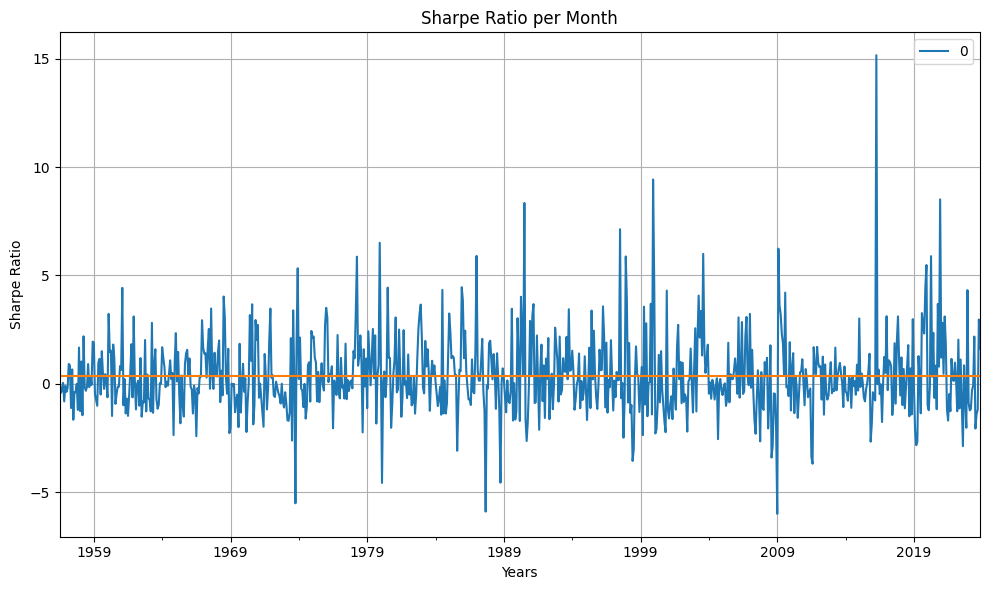

In [ ]:
# Plot the sharpe ratio for each month
ax = plt.subplot()

sharpes = pd.DataFrame(sharpe_ratios, index=dates_with_data)
sharpes.plot(figsize=(10,6), ax=ax)
ax.set_xlabel("Years")
ax.set_ylabel("Sharpe Ratio")
ax.set_title("Sharpe Ratio per Month")
ax.grid()

ax.plot(sharpes.index, [np.mean(sharpes)] * len(sharpes.index))

plt.tight_layout()
plt.show()

In [ ]:
np.mean(sharpes)

0.3693213851950822